In [21]:
%matplotlib inline
import os
import gc
import galsim
import numpy as np
import astropy.io.fits as pyfits
from astropy.visualization import simple_norm

baseDir=os.path.join(os.environ['homeWrk'],'FPFS2/sim')

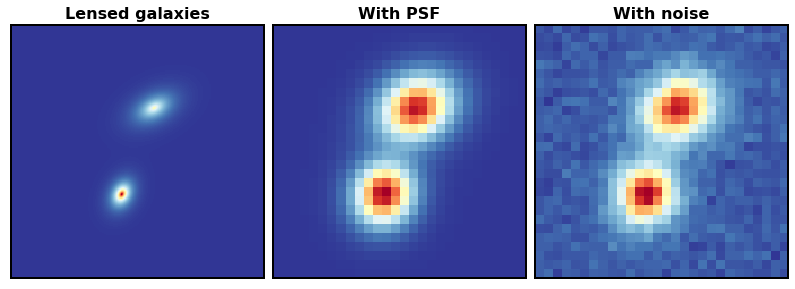

In [32]:
ngrid       =   28
nx          =   1
ny          =   1
ndata       =   nx*ny
nrot        =   4
scale       =   0.168
bigfft      =   galsim.GSParams(maximum_fft_size=10240)
flux_scaling=   2.587

variance    =   0.0035
ud          =   galsim.UniformDeviate(1)
np.random.seed(1)

# training data
catName     =   'real_galaxy_catalog_25.2.fits'
directory   =   os.path.join(os.environ['homeWrk'],'COSMOS/galsim_train/COSMOS_25.2_training_sample/')

# Get the psf
psfFname    =   os.path.join(baseDir,'galaxy_basic3Shift_psf60/psf-60.fits')
psfImg      =   galsim.fits.read(psfFname)
psfInt      =   galsim.InterpolatedImage(psfImg,scale=scale,flux = 1.)

#simulate the galaxy
gal0    =   galsim.Sersic(n=1.,half_light_radius=0.3,trunc=3,flux=0.1)
gal0    =   gal0.shear(g1=0.14,g2=0.2)
gal0b   =   gal0.shift(0.3,0.8)
gal1b   =   galsim.Sersic(n=1.1,half_light_radius=0.2,trunc=3,flux=0.08)
gal1b   =   gal1b.shear(g1=-0.1,g2=0.13).shift(-0.3,-0.8)
gal0    =   gal0b+gal1b
final1  =   gal0
final2  =   galsim.Convolve([psfInt,gal0],gsparams=bigfft)
gal_image1  =   galsim.ImageF(nx*ngrid*8,ny*ngrid*8,scale=scale/8.)
final1.drawImage(gal_image1,method='real_space')
gal_image2  =   galsim.ImageF(nx*ngrid,ny*ngrid,scale=scale)
final2.drawImage(gal_image2)
del gal0,final1,final2
gc.collect

plt.close()
cc='black'
fs=16
figure=plt.figure(figsize=(13,4))
ax=figure.add_subplot(1,3,1)
ax.set_title(r'Lensed galaxies',fontsize=fs,weight='bold')
im=ax.imshow(gal_image1.array,origin='lower',aspect='equal',cmap='RdYlBu_r',interpolation='None',\
             norm=simple_norm(gal_image1.array,'linear'))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
for pos in ['top','right','left','bottom']:
    sp=ax.spines[pos]
    sp.set_color(cc)
    sp.set_linewidth(2)

ax=figure.add_subplot(1,3,2)
ax.set_title(r'With PSF',fontsize=fs,weight='bold')
im=ax.imshow(gal_image2.array,origin='lower',aspect='equal',cmap='RdYlBu_r',interpolation='None',\
             norm=simple_norm(gal_image2.array,'linear'))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
for pos in ['top','right','left','bottom']:
    sp=ax.spines[pos]
    sp.set_color(cc)
    sp.set_linewidth(2)
    
vn          =   galsim.GaussianNoise(ud,6e-5)
gal_image2.addNoise(vn)
ax=figure.add_subplot(1,3,3)
ax.set_title(r'With noise',fontsize=fs,weight='bold')
im=ax.imshow(gal_image2.array,origin='lower',aspect='equal',cmap='RdYlBu_r',interpolation='None',\
             norm=simple_norm(gal_image2.array,'linear'))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
for pos in ['top','right','left','bottom']:
    sp=ax.spines[pos]
    sp.set_color(cc)
    sp.set_linewidth(2)

figure.subplots_adjust(left=0.02,
                bottom=0.02, 
                right=0.98, 
                top=0.90, 
                wspace=-0.3)
#figure.savefig(os.path.join(pltDir,'shearEstSystematics.png'))

In [29]:
help(simple_norm)

Help on function simple_norm in module astropy.visualization.mpl_normalize:

simple_norm(data, stretch='linear', power=1.0, asinh_a=0.1, min_cut=None, max_cut=None, min_percent=None, max_percent=None, percent=None, clip=False, log_a=1000, invalid=-1.0)
    Return a Normalization class that can be used for displaying images
    with Matplotlib.
    
    This function enables only a subset of image stretching functions
    available in `~astropy.visualization.mpl_normalize.ImageNormalize`.
    
    This function is used by the
    ``astropy.visualization.scripts.fits2bitmap`` script.
    
    Parameters
    ----------
    data : ndarray
        The image array.
    
    stretch : {'linear', 'sqrt', 'power', log', 'asinh'}, optional
        The stretch function to apply to the image.  The default is
        'linear'.
    
    power : float, optional
        The power index for ``stretch='power'``.  The default is 1.0.
    
    asinh_a : float, optional
        For ``stretch='asinh'``, the

In [24]:
gal_image1.array.max()

0.00040548455